In [2]:
import dlc_practical_prologue as prologue
from SiameseNet import SiameseNet
from PairDataset import PairDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

data = prologue.generate_pair_sets(1000)
data_train = PairDataset(data, train=True, aux_labels=False)
data_test = PairDataset(data, train=False, aux_labels=False)
data_train_loader = DataLoader(data_train, batch_size=10, shuffle=True, num_workers=12)
data_test_loader = DataLoader(data_test, batch_size=40, num_workers=12)

net = SiameseNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1.2e-2)

In [15]:
import matplotlib.pyplot as plt
import torch

In [3]:
def train(epoch):
    net.train()
    loss_list, batch_list = [], []
    for i, (images, labels) in enumerate(data_train_loader):
        optimizer.zero_grad()

        output = net(images, w_share=False, aux_loss=False)

        loss = criterion(output, labels)

        loss_list.append(loss.detach().item())
        batch_list.append(i + 1)

        loss.backward()
        optimizer.step()
    return loss_list, batch_list, epoch

In [4]:
def test(epoch):
    net.eval()
    total_correct = 0
    avg_loss = 0.0
    for i, (images, labels) in enumerate(data_test_loader):
        output = net(images, w_share=False, aux_loss=False)
        avg_loss += criterion(output, labels).sum()
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()

    avg_loss /= len(data_test)
    print('Epoch: %d, Test Avg. Loss: %f, Accuracy: %f' % (
        epoch, avg_loss.detach().item(), float(total_correct) / len(data_test)))

In [23]:
for i in range(4):
    loss, batch, epo = train(i)
    test(epo + 1)

Epoch: 1, Test Avg. Loss: 0.017291, Accuracy: 0.526000
Epoch: 2, Test Avg. Loss: 0.017289, Accuracy: 0.526000
Epoch: 3, Test Avg. Loss: 0.017287, Accuracy: 0.526000
Epoch: 4, Test Avg. Loss: 0.017285, Accuracy: 0.526000


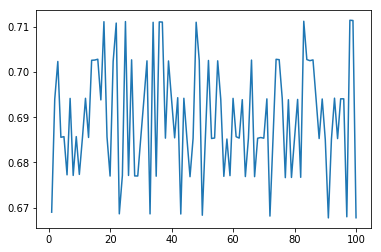

In [6]:
plt.plot(batch, loss)

In [19]:
a = torch.rand((4,10))
a = nn.functional.softmax(a, dim=-1)
a

tensor([[0.1229, 0.1234, 0.1000, 0.0739, 0.1280, 0.0587, 0.1204, 0.1068, 0.0992,
         0.0667],
        [0.0726, 0.1501, 0.0987, 0.0815, 0.0735, 0.0887, 0.0727, 0.1649, 0.1303,
         0.0670],
        [0.0648, 0.0928, 0.0643, 0.0623, 0.1251, 0.1237, 0.1554, 0.1090, 0.1043,
         0.0984],
        [0.1495, 0.0634, 0.1704, 0.1104, 0.0679, 0.0803, 0.0677, 0.0701, 0.1131,
         0.1073]])

In [54]:
from dlc_practical_prologue import generate_pair_sets

In [9]:
feature = data[0]

In [17]:
torch.unsqueeze(feature[0][0], dim=0).size()

torch.Size([1, 14, 14])